In [6]:
import numpy as np
import pandas as pd
import pickle 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df= pd.read_csv('E:\ML Project Code\heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

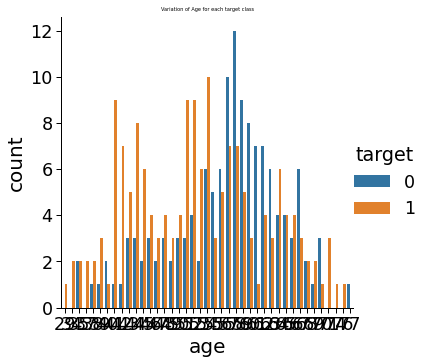

<Figure size 1440x1440 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 5,"axes.labelsize": 20}) 

sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())

plt.title('Variation of Age for each target class')
plt.rcParams['figure.figsize']=(20,20)
plt.figure(figsize=(20,20))
plt.show()

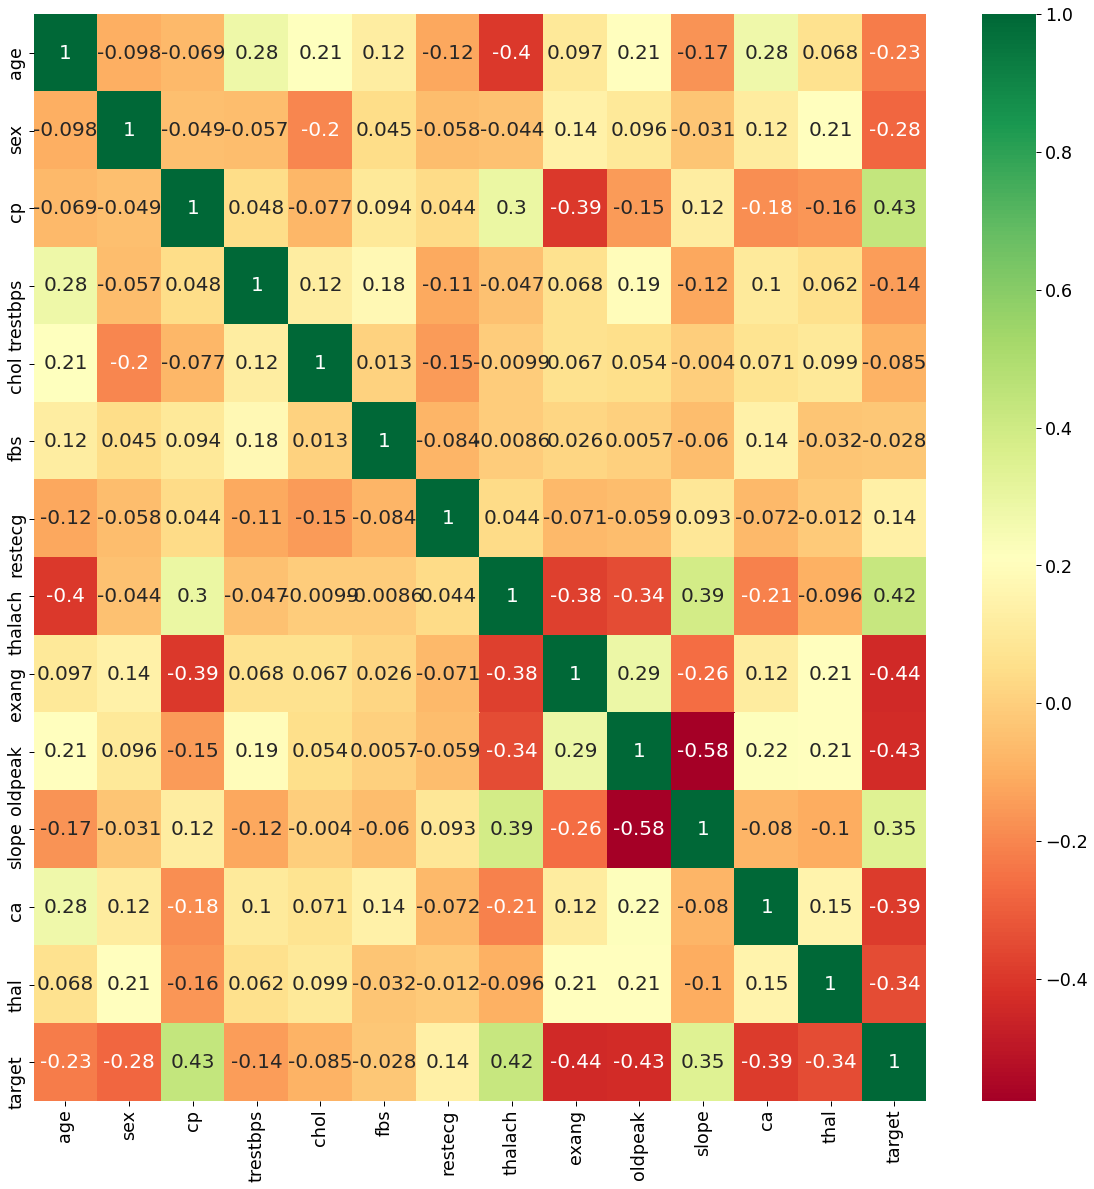

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

<Figure size 1440x1440 with 0 Axes>

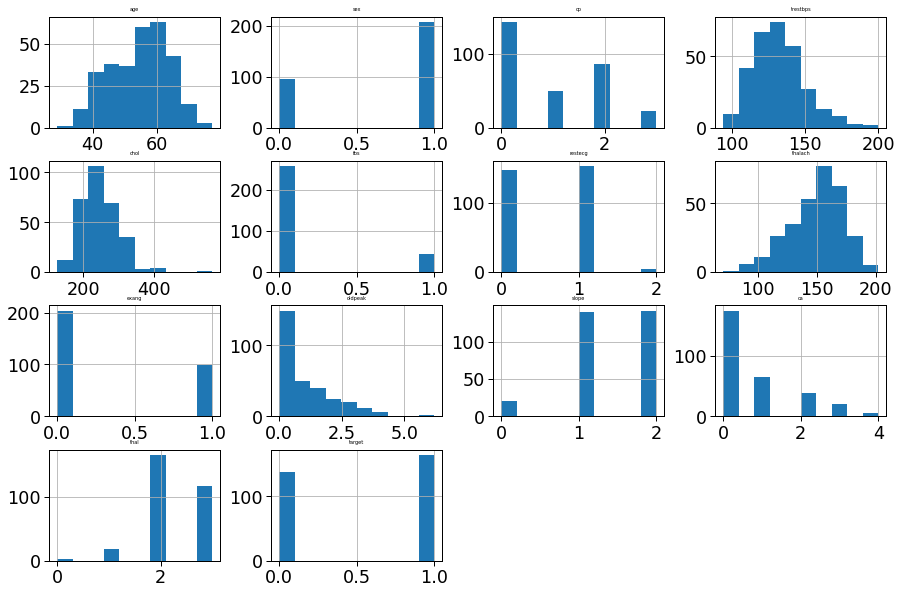

<Figure size 1440x1440 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
df.hist()

plt.figure(figsize=(20,20))

<AxesSubplot:xlabel='target', ylabel='count'>

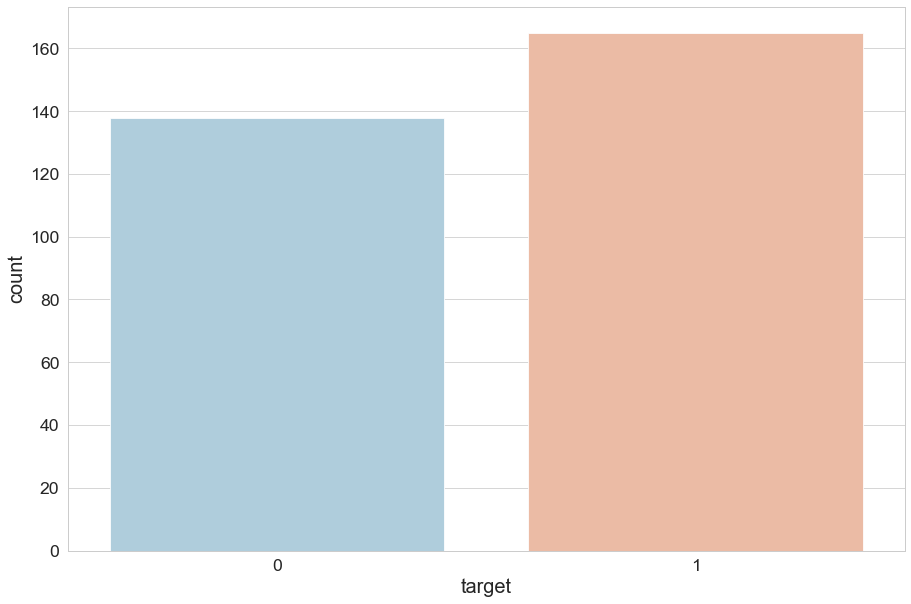

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')

In [17]:
y = df.target
X=df.drop(['target'], axis = 1) 
X
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [19]:
B=[[60,1,0,130,206,0,0,132,1,2.4,1,2,3]]
logreg.predict(B)

array([0], dtype=int64)

In [20]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

303

In [21]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.8547854785478548


In [23]:
entries = list(map(float, input().split())) 

#print("Enter the entries in a single line (separated by space): ") 
# For printing the matrix 
matrix = np.array(entries).reshape(1, 13) 
logreg.predict(matrix)

63 1 3 145 233 1 0 150 0 2.3 0 0 1


array([1], dtype=int64)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7656765676567657


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8151815181518152


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [27]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(303, 13)
(303,)


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(203, 13)
(100, 13)


In [30]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(203,)
(100,)


In [32]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8


In [34]:
B=[[60,1,0,130,206,0,0,132,1,2.4,1,2,3]]
logreg.predict(B)

array([0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)



y_pred_train = logreg.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion matrix for train set')
print(cm_train)

print('Confusion matrix for test set')
print(cm_test)

#TP,TN,FN,FP

print('Accuracy for training set for logistic regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))

print('Accuracy for test set for logistic regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion matrix for train set
[[ 81   6]
 [ 15 101]]
Confusion matrix for test set
[[33 11]
 [ 9 47]]
Accuracy for training set for logistic regression = 0.896551724137931
Accuracy for test set for logistic regression = 0.8


In [36]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.59, 0.58, 0.62, 0.65, 0.66, 0.66, 0.67, 0.67, 0.68, 0.67, 0.66, 0.66, 0.66, 0.64, 0.67, 0.68, 0.68, 0.69, 0.69, 0.71, 0.7, 0.72, 0.7, 0.71, 0.69]


Text(0, 0.5, 'Testing Accuracy')

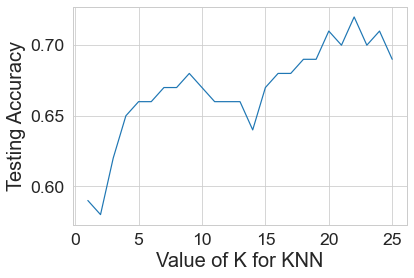

In [37]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [38]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.66


In [39]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

In [40]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

A=[[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
knn.predict(A)

array([1], dtype=int64)

In [41]:
B=[[67,1,0,160,286,0,0,108,1,1.5,1,3,2]]
knn.predict(B)

array([0], dtype=int64)

In [42]:
entries = list(map(float, input().split())) 

#print("Enter the entries in a single line (separated by space): ") 
# For printing the matrix 
matrix = np.array(entries).reshape(1, 13) 
knn.predict(matrix)

63 1 3 145 266 1 0 150 0 2.3 0 0 1


array([0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)



y_pred_train = knn.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion matrix for train set')
print(cm_train)

print('Confusion matrix for test set')
print(cm_test)


print('Accuracy for training set for KNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))

print('Accuracy for test set for KNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion matrix for train set
[[59 22]
 [37 85]]
Confusion matrix for test set
[[25 17]
 [17 41]]
Accuracy for training set for KNN = 0.7093596059113301
Accuracy for test set for KNN = 0.66


In [44]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)





# Predicting the Test set results

y_pred = classifier.predict(X_test)



from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)



y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion matrix for train set')
print(cm_train)

print('Confusion matrix for test set')
print(cm_test)


print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))

print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion matrix for train set
[[77 15]
 [19 92]]
Confusion matrix for test set
[[37 12]
 [ 5 46]]
Accuracy for training set for Naive Bayes = 0.8325123152709359
Accuracy for test set for Naive Bayes = 0.83


In [45]:
C=[[67,1,0,160,286,0,0,108,1,1.5,1,3,2]]
classifier.predict(C)

array([0], dtype=int64)

In [46]:
entries = list(map(float, input().split())) 

#print("Enter the entries in a single line (separated by space): ") 
# For printing the matrix 
matrix = np.array(entries).reshape(1, 13) 
classifier.predict(matrix)

63 1 3 145 233 1 0 150 0 2.3 0 0 1


array([1], dtype=int64)